In [ ]:
#Importing required modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import preprocessing
import scipy as sp
import pickleshare
import seaborn as sns
from pathlib import Path

#Reading in training and test datasets
df_application_train = pd.read_csv('application_train.csv')
df_application_test = pd.read_csv('application_test.csv')

In [ ]:
#show top 5 rows
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Train dataset info: '.format(0),df_application_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40782 entries, 0 to 40781
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(101), int64(5), object(16)
memory usage: 38.0+ MB
Train dataset info:  None


In [ ]:
print('Test dataset info: '.format(0),df_application_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(20), object(16)
memory usage: 1.8+ MB
Test dataset info:  None


In [ ]:
#Encoding categorical variables
df_application_train = pd.get_dummies(df_application_train)
df_application_test = pd.get_dummies(df_application_test)

In [ ]:
print('Train dataset shape: '.format(0),df_application_train.shape)
print('Test dataset shape: '.format(0),df_application_test.shape)

Train dataset shape:  (40782, 244)
Test dataset shape:  (1922, 233)


In [ ]:
#see what the differences are between the training and test datasets
application_train_columns = set(df_application_train.columns)
application_test_columns = set(df_application_test.columns)

columns = application_train_columns-application_test_columns
print(columns)

{'ORGANIZATION_TYPE_Industry: type 6', 'ORGANIZATION_TYPE_Religion', 'ORGANIZATION_TYPE_Culture', 'NAME_INCOME_TYPE_Student', 'ORGANIZATION_TYPE_Industry: type 13', 'ORGANIZATION_TYPE_Industry: type 10', 'ORGANIZATION_TYPE_Insurance', 'NAME_INCOME_TYPE_Unemployed', 'TARGET', 'CODE_GENDER_XNA', 'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5'}


In [ ]:
#Aligning training & test datasets
train_target_labels = df_application_train['TARGET']
df_application_train_align, df_application_test_align = df_application_train.align(df_application_test,join='inner',axis=1)
df_application_train_align['TARGET'] = train_target_labels

In [ ]:
print('Training dataset shape: '.format(0),df_application_train_align.shape)
print('Testing dataset shape: '.format(0),df_application_test_align.shape)

Training dataset shape:  (40782, 233)
Testing dataset shape:  (1922, 232)


In [ ]:
application_train_align_columns = set(df_application_train_align.columns)
application_test_align_columns = set(df_application_test_align.columns)

diff_align_train = application_train_columns - application_train_align_columns
diff_align_test = application_test_columns - application_test_align_columns

print('\nDifference in aligned datasets (Training):\n{}'.format(diff_align_train))
print('\nDifference in aligned datasets (Test):\n{}'.format(diff_align_test))


Difference in aligned datasets (Training):
{'ORGANIZATION_TYPE_Industry: type 6', 'ORGANIZATION_TYPE_Religion', 'ORGANIZATION_TYPE_Culture', 'NAME_INCOME_TYPE_Student', 'ORGANIZATION_TYPE_Industry: type 13', 'ORGANIZATION_TYPE_Industry: type 10', 'ORGANIZATION_TYPE_Insurance', 'NAME_INCOME_TYPE_Unemployed', 'CODE_GENDER_XNA', 'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5'}

Difference in aligned datasets (Test):
{'FONDKAPREMONT_MODE_reg oper ac'}


In [ ]:
df_application_train_align.isnull().sum()

SK_ID_CURR                         0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
                                  ..
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
TARGET                             0
Length: 233, dtype: int64

In [ ]:
df_application_test_align.isnull().sum()

SK_ID_CURR                         0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        2
                                  ..
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
Length: 232, dtype: int64

In [ ]:
#missing value handling
df_application_test_align[df_application_test_align['AMT_ANNUITY'].isna()]
#drop rows with missing value

df_application_test_align.isnull().sum()

SK_ID_CURR                         0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
                                  ..
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
Length: 232, dtype: int64

In [ ]:
#show statistics summary
df_application_test_align.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,...,100.00,100.000000,100.000000,100.0,100.00,100.000000,100.000000,100.000000,100.0,100.0
mean,106693.720000,0.570000,2.163600e+05,5.849999e+05,32941.170000,5.285347e+05,0.025807,-14714.720000,19704.650000,-4830.440000,...,0.01,0.040000,0.030000,0.0,0.01,0.560000,0.340000,0.020000,1.0,0.0
std,3919.134898,0.742028,1.408791e+05,4.214305e+05,18346.125134,3.912874e+05,0.018000,3904.806388,87760.703717,3418.731383,...,0.10,0.196946,0.171447,0.0,0.10,0.498888,0.476095,0.140705,0.0,0.0
min,100107.000000,0.000000,7.200000e+04,6.750000e+04,6750.000000,6.750000e+04,0.003541,-23681.000000,-9280.000000,-14339.000000,...,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,1.0,0.0
25%,103091.250000,0.000000,1.350000e+05,2.642850e+05,20143.125000,2.373750e+05,0.015046,-17379.000000,-3309.250000,-7508.250000,...,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,1.0,0.0
50%,106507.500000,0.000000,1.980000e+05,4.941022e+05,28480.500000,4.545000e+05,0.020479,-13917.000000,-1696.500000,-4509.000000,...,0.00,0.000000,0.000000,0.0,0.00,1.000000,0.000000,0.000000,1.0,0.0
75%,110406.000000,1.000000,2.497500e+05,7.305728e+05,43189.875000,6.750000e+05,0.030899,-11350.500000,-575.000000,-1573.500000,...,0.00,0.000000,0.000000,0.0,0.00,1.000000,1.000000,0.000000,1.0,0.0
max,113549.000000,2.000000,1.350000e+06,1.928304e+06,103455.000000,1.800000e+06,0.072508,-8318.000000,365243.000000,-99.000000,...,1.00,1.000000,1.000000,0.0,1.00,1.000000,1.000000,1.000000,1.0,0.0


In [ ]:
df_application_train_align.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
count,40782.00000,40782.000000,4.078200e+04,4.078200e+04,40782.000000,4.075100e+04,40782.000000,40782.000000,40782.000000,40782.000000,...,40782.000000,40782.000000,40782.000000,40782.000000,40782.000000,40782.000000,40782.000000,40782.000000,40782.000000,40782.000000
mean,123690.76470,0.418984,1.710366e+05,5.989910e+05,27113.590297,5.382323e+05,0.020756,-16026.746555,63694.420529,-4972.378598,...,0.029842,0.007086,0.006155,0.005713,0.213378,0.210510,0.017557,0.519151,0.006670,0.080894
std,13627.51122,0.725174,5.868423e+05,4.015928e+05,14585.098653,3.689559e+05,0.013766,4357.124913,141196.995868,3519.470030,...,0.170152,0.083883,0.078211,0.075371,0.409698,0.407676,0.131335,0.499639,0.081396,0.272675
min,100002.00000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-17531.000000,-21244.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111870.25000,0.000000,1.125000e+05,2.700000e+05,16480.125000,2.385000e+05,0.010006,-19656.000000,-2785.750000,-7447.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,123786.50000,0.000000,1.440000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15743.500000,-1220.000000,-4478.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,135496.75000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12385.250000,-288.000000,-2006.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,147228.00000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dilihat dari data DAYS_EMPLOYED, dibandingkan dengan data DAYS_BIRTH bervariasi secara merata di seluruh distribusi, pada data DAYS_EMPLOYED terlihat ada kesalahan karena ada lonjakan yang tiba-tiba di atas 350.000/hari, jadi harus diselidiki lebih lanjut.

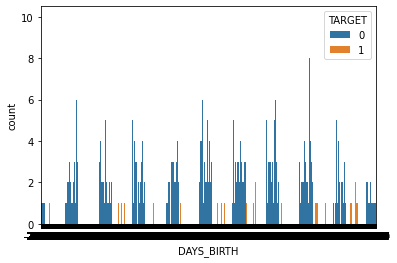

In [ ]:
#visualization
import seaborn as sns

sns.countplot(data=df_application_train_align,x="DAYS_BIRTH",hue='TARGET')


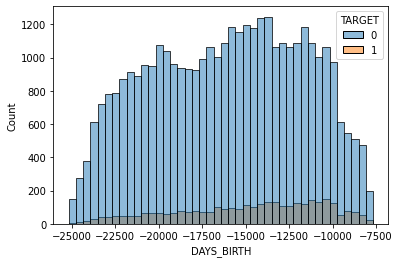

In [ ]:
sns.histplot(data=df_application_train_align,x="DAYS_BIRTH",hue='TARGET')

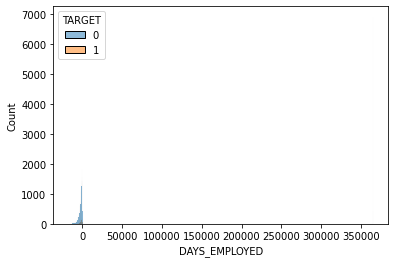

In [ ]:
sns.histplot(data=df_application_train_align,x="DAYS_EMPLOYED",hue='TARGET')

In [ ]:
#Analyzing the DAYS_EMPLOYED feature for errors
df_application_train_align['DAYS_EMPLOYED'].describe()

count     40782.000000
mean      63694.420529
std      141196.995868
min      -17531.000000
25%       -2785.750000
50%       -1220.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
maxVal = max(df_application_train_align['DAYS_EMPLOYED'])
numErrorVal = df_application_train_align[df_application_train_align['DAYS_EMPLOYED']==maxVal].shape[0]
print(numErrorVal)

7332


In [ ]:
pd.unique(df_application_train_align['DAYS_EMPLOYED'])

array([  -637,  -1188,   -225, ..., -11538,  -8377,  -8538])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


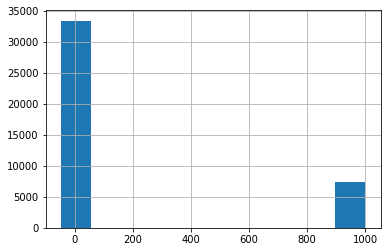

In [ ]:
#Additional analysis for DAYS_EMPLOYED
daysEmp_data = df_application_train_align[['TARGET','DAYS_EMPLOYED']]
daysEmp_data.loc[:,'YEARS_EMPLOYED'] = daysEmp_data['DAYS_EMPLOYED']/365
daysEmp_data['YEARS_EMPLOYED'].hist()

In [ ]:
daysEmp_data['YEARS_BINNED'] = pd.cut(daysEmp_data['YEARS_EMPLOYED'],bins=np.linspace(-50,0,num=11))
daysEmp_group = daysEmp_data.groupby('YEARS_BINNED').mean()
daysEmp_group

<ipython-input-96-d120e10d2786>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daysEmp_data['YEARS_BINNED'] = pd.cut(daysEmp_data['YEARS_EMPLOYED'],bins=np.linspace(-50,0,num=11))


,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
YEARS_BINNED,,,
"(-50.0, -45.0]",0.000000,-17190.000000,-47.095890
"(-45.0, -40.0]",0.000000,-15399.652174,-42.190828
"(-40.0, -35.0]",0.016393,-13578.573770,-37.201572
"(-35.0, -30.0]",0.045802,-11787.351145,-32.294113
"(-30.0, -25.0]",0.038813,-9916.034247,-27.167217
"(-25.0, -20.0]",0.045759,-8098.878348,-22.188708
"(-20.0, -15.0]",0.042120,-6301.692255,-17.264910
"(-15.0, -10.0]",0.053713,-4458.184434,-12.214204
"(-10.0, -5.0]",0.075207,-2630.195609,-7.206015


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Days Employed Groups (Years)')

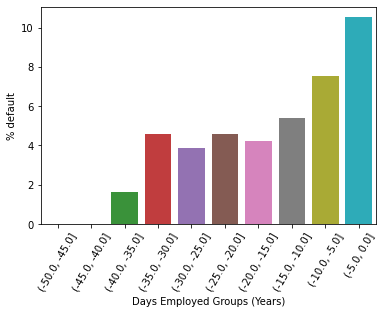

In [ ]:
sns.barplot(daysEmp_group.index,daysEmp_group['TARGET']*100)
plt.xticks(rotation=60)
plt.ylabel('% default')
plt.xlabel('Days Employed Groups (Years)')

In [ ]:
#correlation

# 0 no correlation
# 1 positive correlation
# -1 negative correlation

df_application_train3=df_application_train2.corr()['DAYS_EMPLOYED'].sort_values().reset_index()

df_application_train3

,index,DAYS_EMPLOYED
0,FLAG_EMP_PHONE,-0.999719
1,DAYS_BIRTH,-0.616763
2,NAME_INCOME_TYPE_Working,-0.487409
3,DAYS_ID_PUBLISH,-0.268395
4,REG_CITY_NOT_WORK_CITY,-0.255306
...,...,...
228,FLAG_DOCUMENT_6,0.589664
229,NAME_INCOME_TYPE_Pensioner,0.999303
230,ORGANIZATION_TYPE_XNA,0.999886
231,DAYS_EMPLOYED,1.000000


In [ ]:
#get dummies to transform data 
df_application_train2=pd.get_dummies(df_application_train_align,drop_first=True)

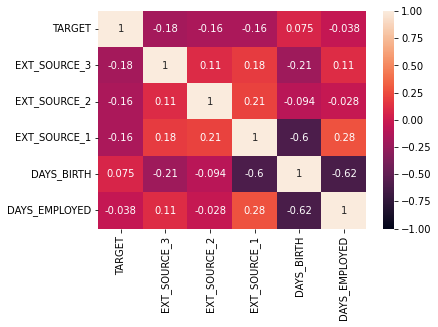

In [ ]:
df_ext_src = df_application_train_align[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED']] 
df_ext_src_corr = df_ext_src.corr()
sns.heatmap(df_ext_src_corr,vmin=-1.0,vmax=1.0,annot=True)